# Table of Contents

1. [Problem Statement](#pstatement)
2. [Data Loading and Spliting](#dload)
3. [Data Augmentation](#daugment)
4. [Model Building](#mbuild)
5. [Model Training](#mtrain)
6. [Performance Visualization](#pvis)
7. [Model Testing](#mtest)
8. [Performance Measures](#pmeasures)
9. [Qualitative Results](#quality)

# Problem Statement<a id='pstatement'><\a>
To implement an image degmentation pipeline using CNNs to get sementic understanding of the images.


**Monuseg dataset** (available [here](https://monuseg.grand-challenge.org/Data/)) is downloaded and the ground truth segmentation masks are created. The dataset can be either obtained from the instructor or can be downloaded from [this](https://drive.google.com/drive/folders/1hnHjxFb52BdhxkcV_N7MdWLdagzXHzmq?usp=sharing) Google Drive link.

In [0]:
#Imports the print function from newer versions of python
from __future__ import print_function

%tensorflow_version 1.x
%matplotlib inline

TensorFlow 1.x selected.


In [0]:
!rm -r Semantic_Segmentation_Keras

rm: cannot remove 'Semantic_Segmentation_Keras': No such file or directory


In [0]:
!git clone https://github.com/zeeshanalipnhwr/Semantic-Segmentation-Keras
!mv Semantic-Segmentation-Keras Semantic_Segmentation_Keras

Cloning into 'Semantic-Segmentation-Keras'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 612 (delta 91), reused 0 (delta 0), pack-reused 447
Receiving objects: 100% (612/612), 47.98 MiB | 24.31 MiB/s, done.
Resolving deltas: 100% (304/304), done.


# Data Loading and Spliting<a id='dload'><\a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip "/content/drive/My Drive/MonuSeg-dataset"

Archive:  /content/drive/My Drive/MonuSeg-dataset.zip
  inflating: MonuSeg/Test/GroundTruth/TCGA-AC-A2FO-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-IZ-8196-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-ZF-A9R5-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-A6-6782-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-2Z-A9J9-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-HT-8564-01Z-00-DX1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-44-2665-01B-06-BS6_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-EJ-A46H-01A-03-TSC_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-69-7764-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-GL-6846-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-CU-A0YN-01A-02-BSB_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-FG-A4MU-01B-01-TS1_bin_mask.png  
  inflating: MonuSeg/T

In [0]:
files_path = "./MonuSeg"

In [0]:
from Semantic_Segmentation_Keras.Utils import display, load_data2
import numpy as np

(X_train, X_valid, X_test,
 Y_train, Y_valid, Y_test) = load_data2.load_data(files_path, load_as="rgb", sub_images_size=(256, 256),
                                                  overlap_ratio=.2, validation_size=0.25)

print ("X_train: ", X_train.shape, "\nY_train: ", Y_train.shape)
print ("X_valid: ", X_valid.shape, "\nY_valid: ", Y_valid.shape)
print ("X_test: ", X_test.shape, "\nY_test: ", Y_test.shape)

X_train:  (562, 256, 256, 3) 
Y_train:  (562, 256, 256, 1)
X_valid:  (188, 256, 256, 3) 
Y_valid:  (188, 256, 256, 1)
X_test:  (14, 1000, 1000, 3) 
Y_test:  (14, 1000, 1000, 1)


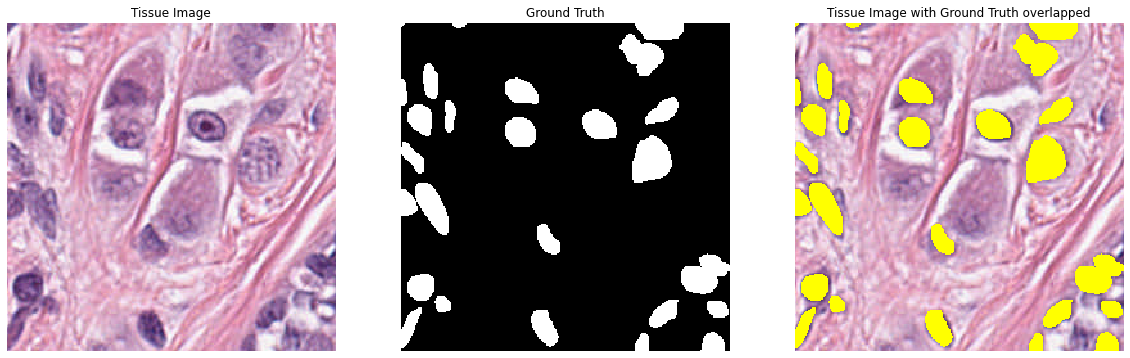

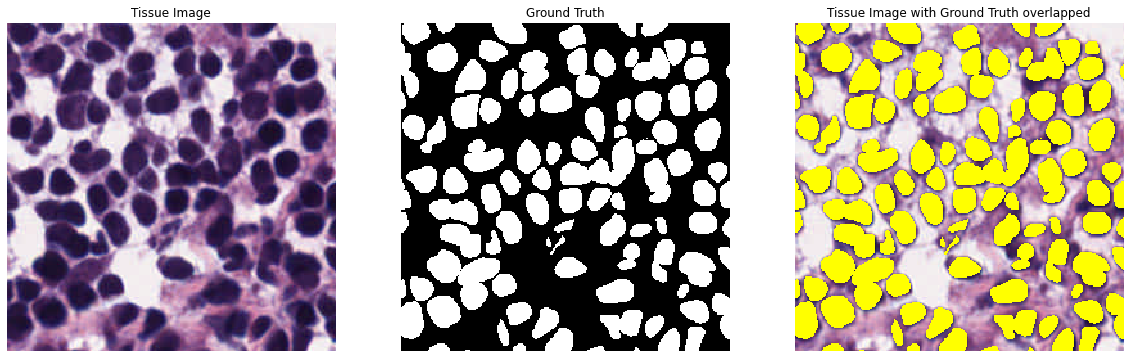

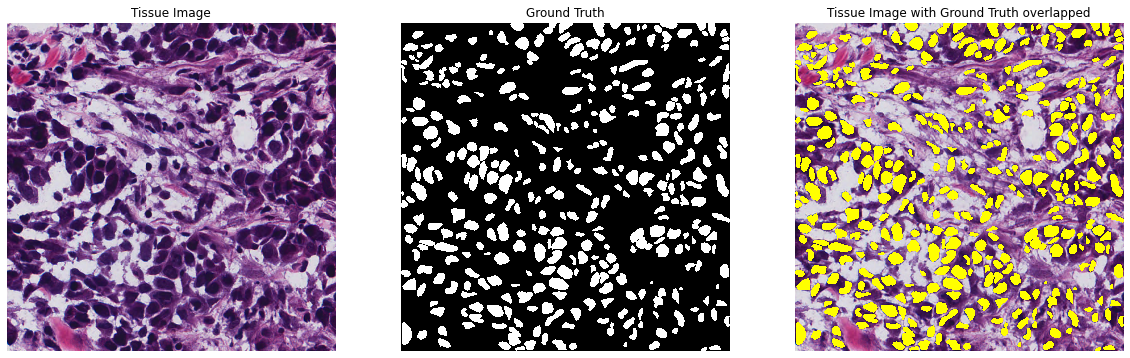

In [0]:
display.display_masked(image=X_train[0], mask=Y_train[0].round(0),
               image_name="Tissue Image", mask_name="Ground Truth")
display.display_masked(image=X_valid[0], mask=Y_valid[0].round(0),
               image_name="Tissue Image", mask_name="Ground Truth")
display.display_masked(image=X_test[0], mask=Y_test[0].round(0),
               image_name="Tissue Image", mask_name="Ground Truth")

Pad zeroes to the test data to reshape them as 1024x1024 from 1000x1000.

In [0]:
X_test_padded = np.zeros((X_test.shape[0], 1024, 1024, 3))
Y_test_padded = np.zeros((Y_test.shape[0], 1024, 1024, 1))
X_test_padded[:, 12:12+1000, 12:12+1000, :] = X_test
Y_test_padded[:, 12:12+1000, 12:12+1000, :] = Y_test
X_test = X_test_padded
Y_test = Y_test_padded
print ("X_test: ", X_test.shape, "\nY_test: ", Y_test.shape)

X_test:  (14, 1024, 1024, 3) 
Y_test:  (14, 1024, 1024, 1)


# Data Augmentation

In [0]:
from Semantic_Segmentation_Keras.Utils import custom_data_augmenter

In [0]:
augmented_X_train, augmented_Y_train = custom_data_augmenter.augment_segmentation_data(X_train, Y_train, rotate=True, flip_horizontal=True, flip_vertical=True,
                                                                                       rotate_percent=.1, flip_horizontal_percent=.1, flip_vertical_percent=.1)
print ("augmented_X_train.shape:", augmented_X_train.shape)

augmented_X_train.shape: (888, 256, 256, 3)


In [0]:
augmented_X_valid, augmented_Y_valid = custom_data_augmenter.augment_segmentation_data(X_valid, Y_valid, rotate=True, flip_horizontal=True, flip_vertical=True,
                                                                                       rotate_percent=.2, flip_horizontal_percent=.2, flip_vertical_percent=.2)
print ("augmented_X_valid.shape:", augmented_X_valid.shape)

augmented_X_valid.shape: (436, 256, 256, 3)


In [0]:
from Semantic_Segmentation_Keras.Configs import UNet_Configs

from keras.preprocessing.image import ImageDataGenerator

train_loader = ImageDataGenerator().flow(augmented_X_train, augmented_Y_train, batch_size=16)
valid_loader = ImageDataGenerator().flow(augmented_X_valid, augmented_Y_valid, batch_size=16)

# flush out this data as we do not need it now
X_train, Y_train, X_valid, Y_valid = None, None, None, None
augmented_X_train, augmented_Y_train = None, None
augmented_X_valid, augmented_Y_valid = None, None

# Model Building<a id='mbuild'><\a>

![UNet Architecture](https://vasanashwin.github.io/retrospect/images/unet.png)

In [0]:
from Semantic_Segmentation_Keras.Models import UNet
from Semantic_Segmentation_Keras.Configs import UNet_Configs

model = UNet.UNet(depth=UNet_Configs.DEPTH).UNet(input_shape=(None, None, 3))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 1 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 1 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, None, None, 1 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

# Model Training<a id='mtrain'><\a>

In [0]:
from Semantic_Segmentation_Keras import train
H = train.train_model_on_augmented_data(model, train_loader, validation_data=valid_loader,
                                        optimizer=UNet_Configs.OPTIMIZER,
                                        batch_size=UNet_Configs.BATCHSIZE,
                                        epochs=UNet_Configs.EPOCHS,
                                        save=True, save_to="drive/My Drive/", save_as="UNet_basic")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





56/56 [==============================] - 21s 379ms/step - loss: 0.5084 - acc: 0.7200 - f1_score: 0.0458 - val_loss: 0.4280 - val_acc: 0.7798 - val_f1_score: 0.3714
Epoch 2/100
56/56 [==============================] - 6s 102ms/step - loss: 0.4094 - acc: 0.8182 - f1_score: 0.6260 - val_loss: 0.3610 - val_acc: 0.8362 - val_f1_score: 0.6308
Epoch 3/100
56/56 [==============================] - 6s 103ms/step - loss: 0.3449 - acc: 0.8477 - f1_score: 0.6934 - val_loss: 0.3148 - val_acc: 0.8542 - val_f1_score: 0.6919
Epoch 4/100
56/56 [==============================] - 6s 102ms/step - loss: 0.3181 - acc: 0.8591 - f1_score: 0.7274 - val_loss: 0.3138 - val_acc: 0.8588 - val_f1_score: 0.7004
Epoch 5/100
56/56 [==============================] - 6s 103ms/step - loss: 0.3103 - acc: 0.8626 - f1_score: 0.7366 - val_loss: 0.2808 - val_acc: 0.8731 - val_f1_score: 0.7563
Epoch 6/100
56/56 [=

# Performance Visualization<a id='pvis'><\a>

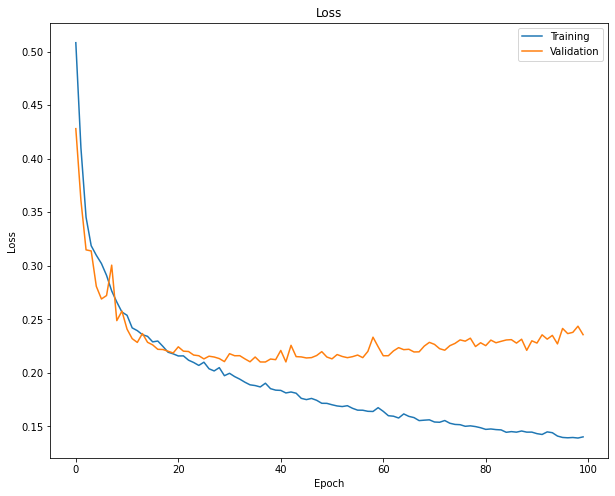

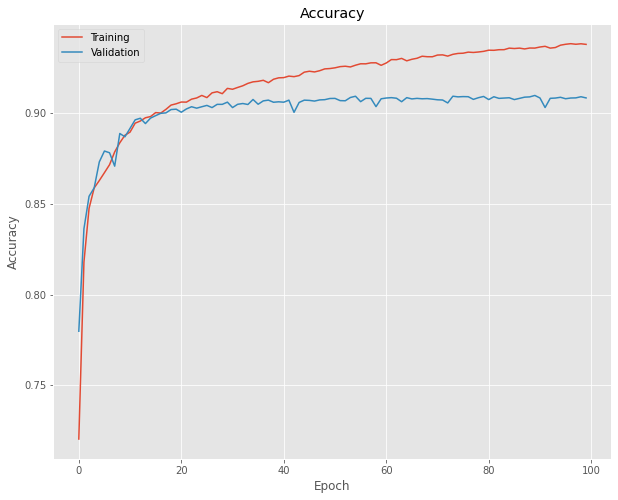

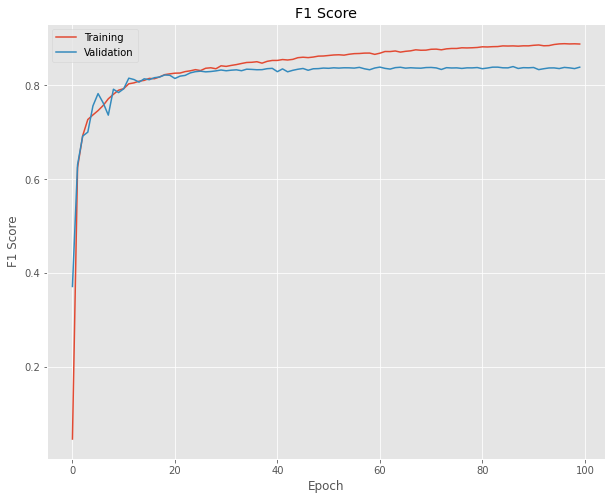

In [0]:
from Semantic_Segmentation_Keras.Utils import display

display.plot_train_valid_performance(H, UNet_Configs.EPOCHS, save_figures=True,
                                     save_to="drive/My Drive/", model_name="UNet_basic")

# Model Testing<a id='mtest'><\a>

In [0]:
# remove the padded zeros from X_test and Y_test
X_test = X_test[:, 12:12+1000, 12:12+1000, :]
Y_test = Y_test[:, 12:12+1000, 12:12+1000, :]

In [0]:
# evaluate the model on the test data
test_loss, test_acc, test_f1_score = model.evaluate(X_test, Y_test, batch_size=UNet_Configs.BATCHSIZE)
test_loss, test_acc, test_f1_score

In [0]:
# make predictions on the network
predictions = model.predict(X_test, batch_size=UNet_Configs.BATCHSIZE)

In [0]:
# discard the predictions for the padded portion of X_train
predictions = predictions[:, 12:12+1000, 12:12+1000, :]

# Performance Measures<a id='pmeasures'><\a>

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
TN, FP, FN, TP = confusion_matrix(Y_test.flatten().astype(int),
                             predictions.round(0).flatten().astype(int)).ravel()

In [0]:
TN, FP, FN, TP

(10302123, 932661, 400115, 2365101)

## Accuracy
It is defined as $accuracy = \frac{TP+TN}{TP+FP+TN+FN}$.

In [0]:
print ("Accuracy:", round((TP+TN)/(TP+FP+TN+FN), 4))

Accuracy: 0.9048


In [0]:
print ("Accuracy:", round(test_acc, 4))

## F1 Score (Dice Score)

It is defined as the harmonic mean of precision and recall as $F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$ where $precision=\frac{TP}{TP+FP}$ and $recall=\frac{TP}{TP+FN}$. This simplifies to and hence is equal to the dice score coefficient which is defined as $DSC = \frac{2\times{TP}}{2\times{TP}+FP+FN}$.

In [0]:
precision, recall = TP/(TP+FP), TP/(TP+FN)
print ("F1 Score:", round(2.0/(1.0/precision+1.0/recall), 4))

F1 Score: 0.7802


In [0]:
print ("F1 Score:", round(test_f1_score, 4))

## Classification Report

In [0]:
print (classification_report(Y_test.round(0).flatten().astype(int), predictions.round(0).flatten().astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94  11234784
           1       0.72      0.86      0.78   2765216

    accuracy                           0.90  14000000
   macro avg       0.84      0.89      0.86  14000000
weighted avg       0.91      0.90      0.91  14000000



## Confusion Matrix

In [0]:
Confusion_Matrix = ([[TN, FP], [FN, TP]])
Confusion_Matrix

[[10302123, 932661], [400115, 2365101]]

# Qualitative Results

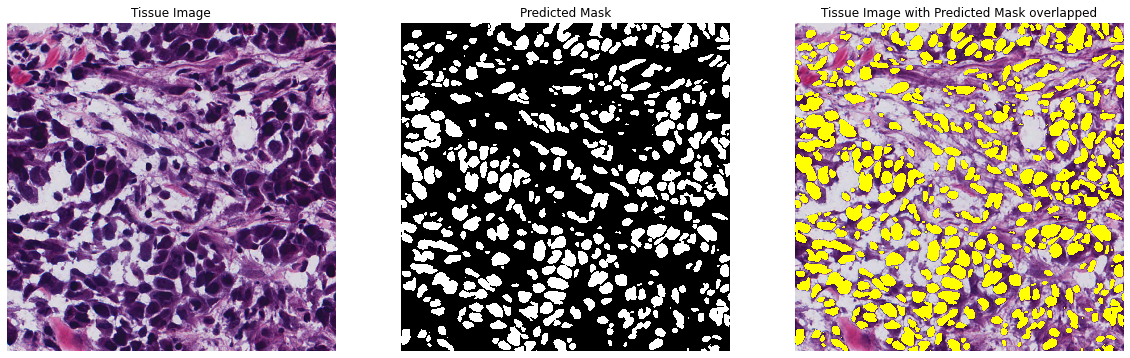

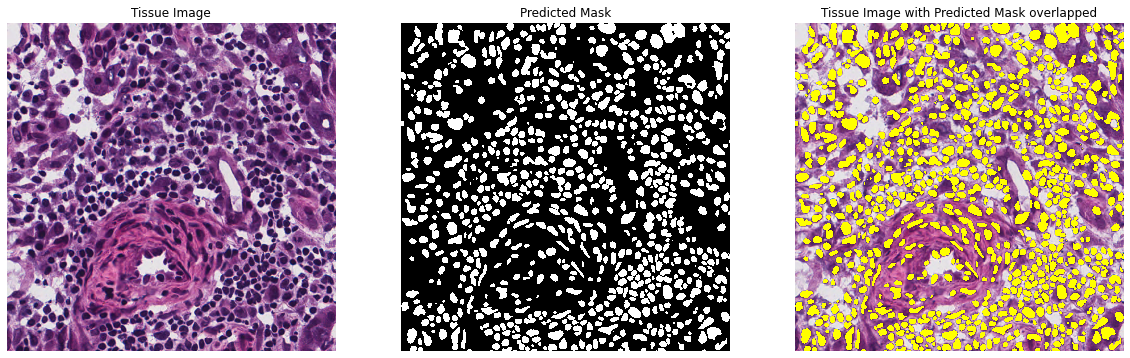

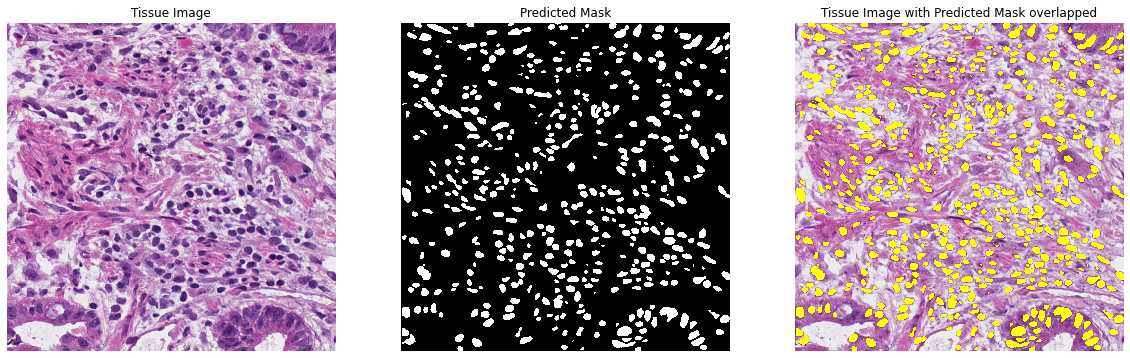

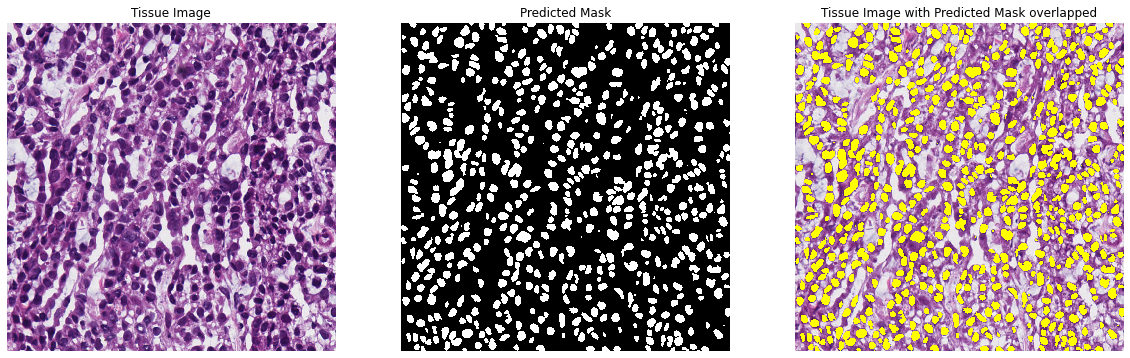

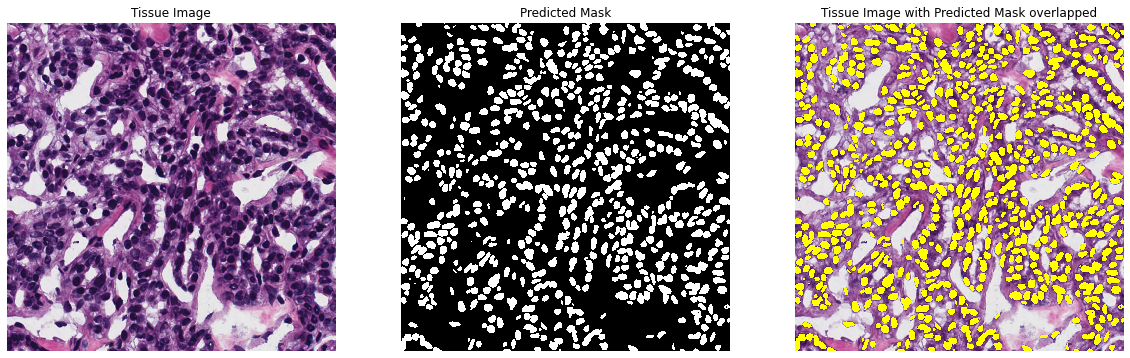

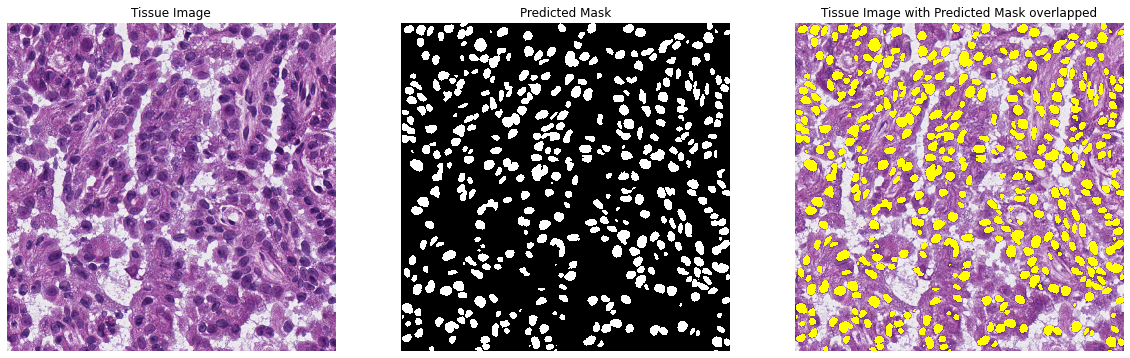

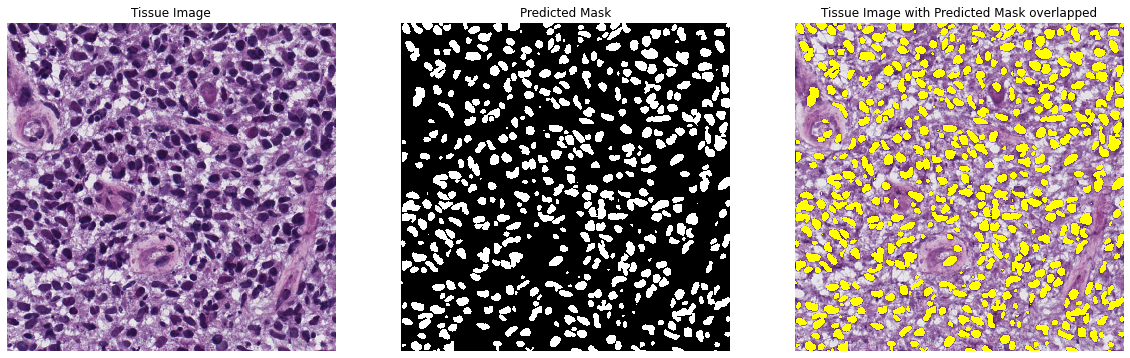

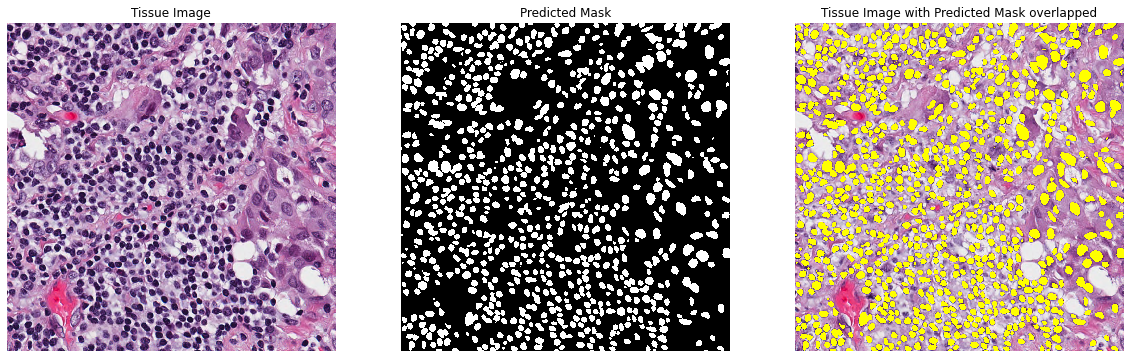

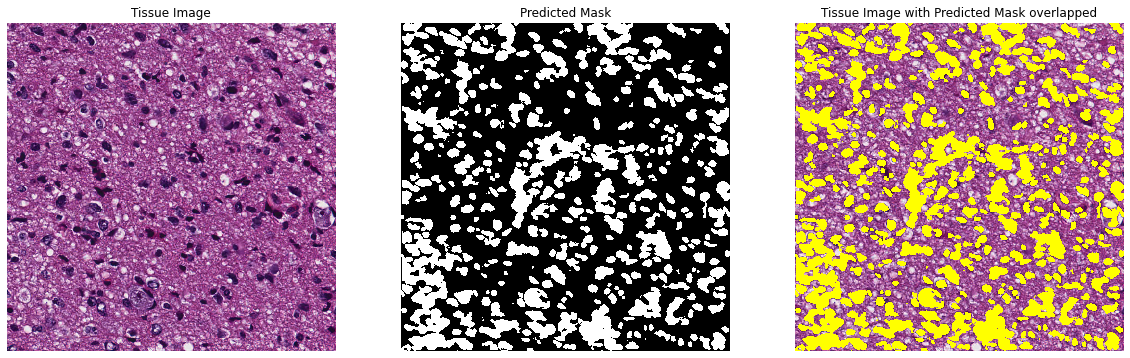

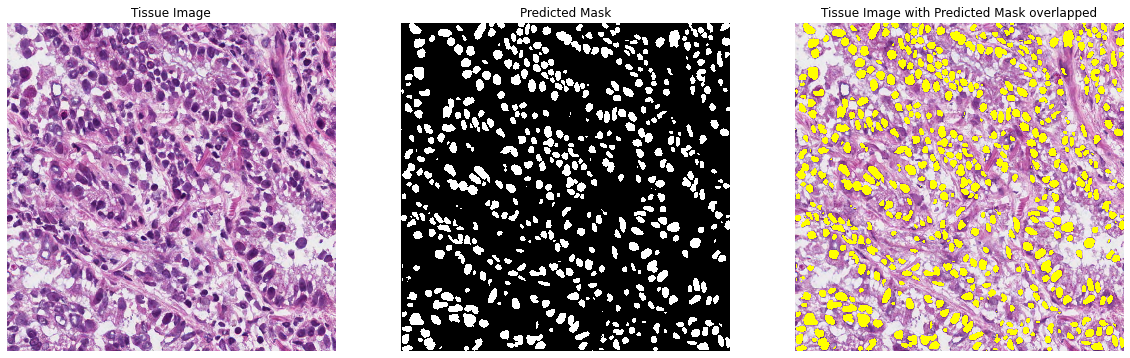

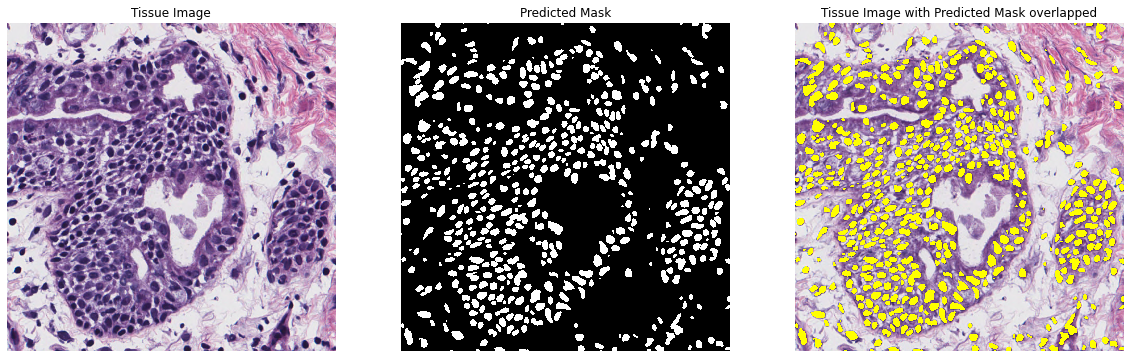

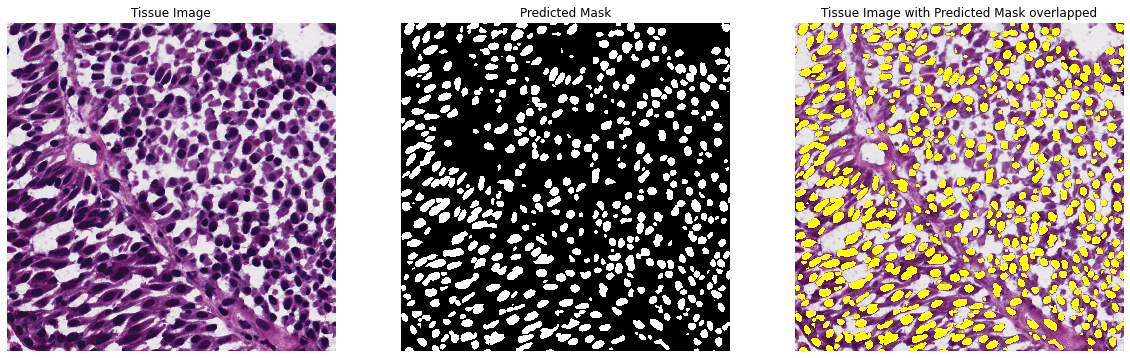

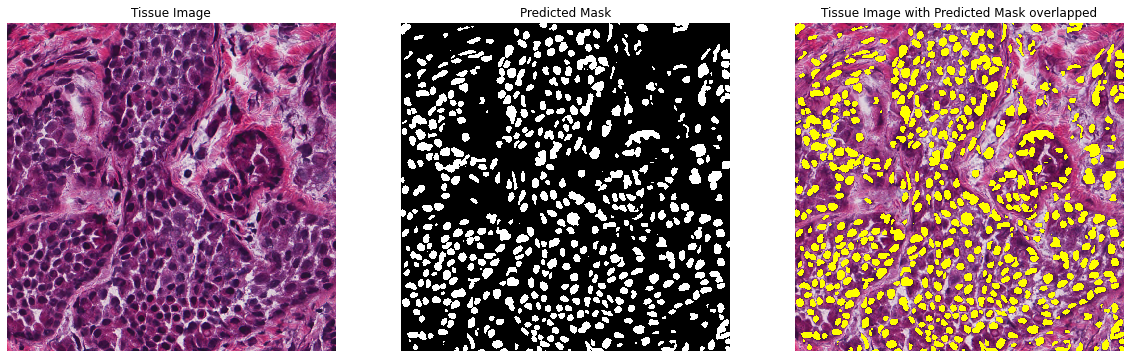

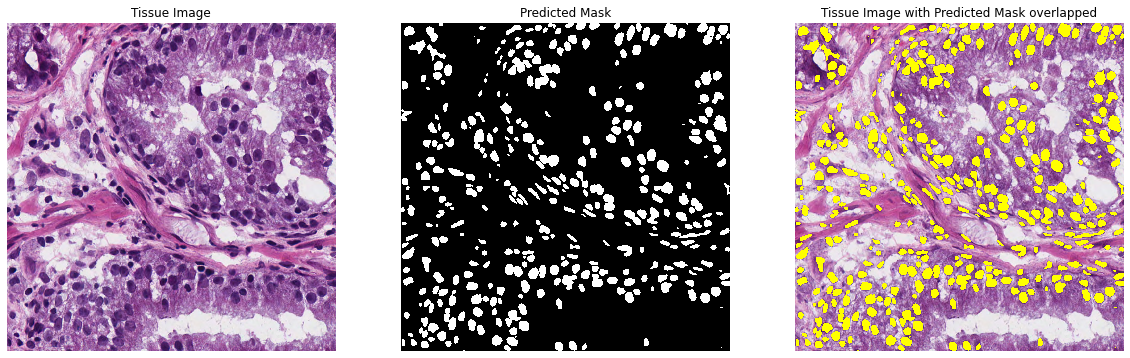

In [0]:
for idx in range(X_test.shape[0]):
    display.display_masked(X_test[idx], predictions[idx].round(0), "Tissue Image", "Predicted Mask")